In [29]:
!pip install opencv-contrib-python
!pip install --upgrade google-cloud-vision

In [30]:
import os
import io
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt

import cv2
from google.cloud import vision

In [31]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [32]:
# 이미지에 텍스트 표시를 위한 함수 정의
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_converted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_converted)

    # 기본 폰트를 로드
    image_font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)

    draw.text((x, y), text, font=image_font, fill=color)

    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

    return opencv_image



In [33]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/summer-branch-410822-fc2d8cfced84.json'

client_options = {'api_endpoint': 'eu-vision.googleapis.com'}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [34]:
path = '/content/img.jpg'
with io.open(path, 'rb') as image_file:
    content = image_file.read()

In [35]:
image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations


"Employee Name: Jiwon
Manager Name:
Day
6/23/2022 Thursday 09:00
6/24/2022 Friday 08.00
6/25/2022 Saturday oq
6/26/2022 Sunday
09:00
6/27/2022 Monday 10:00
6/28/2022 Tuesday 10:00
6/29/2022 Wednesday /000
Date
Employee Signature:
Manager Signature:
Time In
Time Out
12:00
11:30
12:00
12:00
12:00
12:30
12:30
Time In
13:30
13:30
13:30
13:30
13:30
13:30
13:50
Week Starting: 6/23/2022
Time Out
16:30
19:00
16:30
18:00
16:30
16:30
17:00
Total Hours
Rate Per Hour
Total Pay
Total Hours
0:00
0:00
0:00
0:00
0:00
0:00
0:00
0:00
$15.00
$0.00
Brought to you by TimeDoctor.com"

"Employee"

"Name"

":"

"Jiwon"

"Manager"

"Name"

":"

"Day"

"6/23/2022"

"Thursday"

"09:00"

"6/24/2022"

"Friday"

"08.00"

"6/25/2022"

"Saturday"

"oq"

"6/26/2022"

"Sunday"

"09:00"

"6/27/2022"

"Monday"

"10:00"

"6/28/2022"

"Tuesday"

"10:00"

"6/29/2022"

"Wednesday"

"/"

"000"

"Date"

"Employee"

"Signature"

":"

"Manager"

"Signature"

":"

"Time"

"In"

"Time"

"Out"

"12:00"

"11:30"

"12:00"

"12:00"



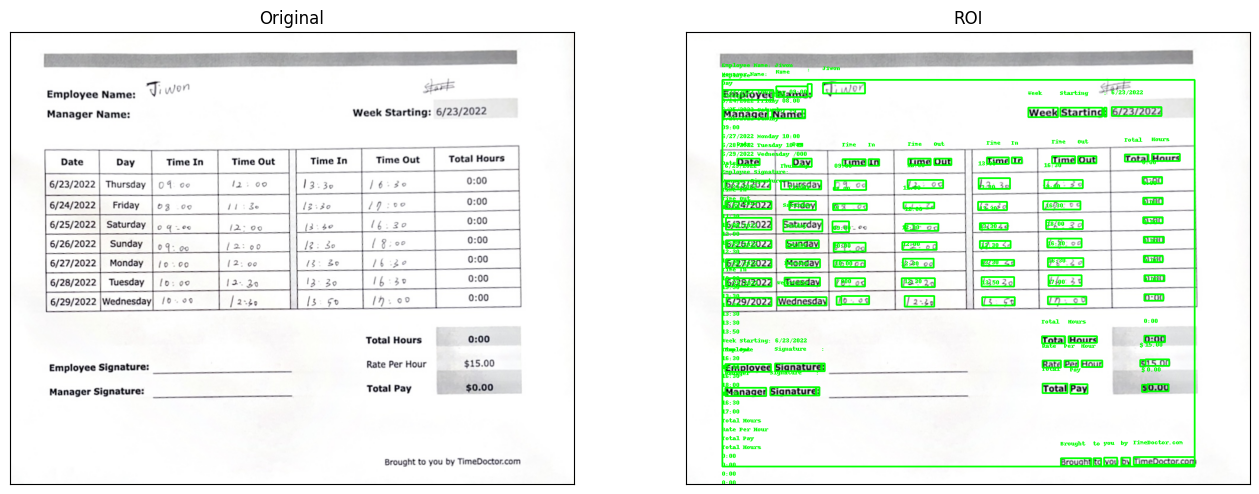

In [36]:
img = cv2.imread(path)
roi_img = img.copy()

for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])

    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y

    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))

plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))